In [4]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home="/home/ashryaagr/Desktop/ML/")
X = mnist.data.astype('float64')
y = mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

X = X / 255.

# rescale the data and split into training and testing dataset
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Iteration 1, loss = 0.28842465
Iteration 2, loss = 0.12633112
Iteration 3, loss = 0.09598869
Iteration 4, loss = 0.07652669
Iteration 5, loss = 0.06515195
Iteration 6, loss = 0.05616051
Iteration 7, loss = 0.04763831
Iteration 8, loss = 0.04182944
Iteration 9, loss = 0.03745659
Iteration 10, loss = 0.03228728
Iteration 11, loss = 0.02894029
Iteration 12, loss = 0.02489466
Iteration 13, loss = 0.02123094
Iteration 14, loss = 0.02131099
Iteration 15, loss = 0.01907818
Iteration 16, loss = 0.01798738
Iteration 17, loss = 0.01234699
Iteration 18, loss = 0.01280170
Iteration 19, loss = 0.01050941
Iteration 20, loss = 0.00854842
Iteration 21, loss = 0.00892170
Iteration 22, loss = 0.00750284
Iteration 23, loss = 0.00588088
Iteration 24, loss = 0.00700820
Iteration 25, loss = 0.01174190
Iteration 26, loss = 0.01547205
Iteration 27, loss = 0.01342130
Iteration 28, loss = 0.00628802
Iteration 29, loss = 0.00498782
Iteration 30, loss = 0.00211648


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.999917
Test set score: 0.976300


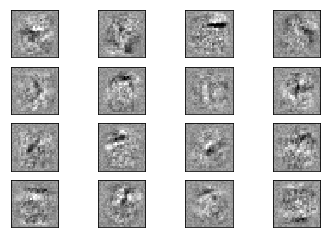

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50),
                    max_iter=30,
                    alpha=1e-4,
                    activation='tanh',
                    solver='sgd',
                    verbose=10,
                    tol=1e-4,
                    random_state=1,
                    learning_rate='adaptive',
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28),
               cmap=plt.cm.gray,
               vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()
# This model suffers from the problem of overfitting..But still tehe test accuracy does not change much

In [7]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'max_iter': 10,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 10,
 'warm_start': False}